In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import plotly.express as px

In [30]:
df = pd.read_excel("C:/Users/ADMIN/Saikat VS/Bank loan analysis/financial_loan.xlsx")
df['issue_date'] = pd.to_datetime(df['issue_date'])

In [31]:
total_application = df['id'].count()

print('Total loan application :', total_application)

Total loan application : 38576


In [32]:
df['issue_date'].max()

Timestamp('2021-12-12 00:00:00')

In [33]:
latest_issue = df['issue_date'].max()
latest_issue_year = latest_issue.year
latest_issue_month = latest_issue.month
df_last_month_total_application = df[(df['issue_date'].dt.year == latest_issue_year) & (df['issue_date'].dt.month == latest_issue_month)]
month_to_date_applications = df_last_month_total_application['id'].count()

print(f"Month to date total loan applications for ({latest_issue_month}, {latest_issue_year}): {month_to_date_applications}")

Month to date total loan applications for (12, 2021): 4314


In [34]:
funded_amount = df['loan_amount'].sum()
funded_amount = funded_amount / 1000000
total_funded_amount = f"${funded_amount:.2f}M"

print("Total Funded Amount :", total_funded_amount)

Total Funded Amount : $435.76M


In [35]:
df_funded_amount_month_to_date = df[(df['issue_date'].dt.year == latest_issue_year) & (df['issue_date'].dt.month == latest_issue_month)]
total_funded_amount_mtd = df_funded_amount_month_to_date['loan_amount'].sum()
total_funded_amount_mtd = total_funded_amount_mtd / 1000000
total_funded_amount_mtd = f"${total_funded_amount_mtd:.2f}M"

print("Month to date Total funded amount :", total_funded_amount_mtd)


Month to date Total funded amount : $53.98M


In [36]:
amount_received = df['total_payment'].sum()
amount_received = amount_received / 1000000
total_amount_received = f"${amount_received:.2f}M"

print("Total amount received till now :", total_amount_received)

Total amount received till now : $473.07M


In [37]:
df_mtd_amount_received = df[(df['issue_date'].dt.year == latest_issue_year) & (df['issue_date'].dt.month == latest_issue_month)]
total_mtd_amount_received = df_mtd_amount_received['loan_amount'].sum()
total_mtd_amount_received = total_mtd_amount_received/1000000
total_mtd_amount_received = f"${total_mtd_amount_received:.2f}M"

print("Mtd Total amount received :", total_mtd_amount_received)

Mtd Total amount received : $53.98M


In [38]:
Avg_int_rate = df['int_rate'].mean()
Avg_int_rate = Avg_int_rate * 100
Avg_int_rate = f"{Avg_int_rate:.2f}%"

print("Average Interest Rate of all loans :", Avg_int_rate)

Average Interest Rate of all loans : 12.05%


In [39]:
list = ['Current', 'Fully Paid']
df_good_loan = [df[df['loan_status'] == text] for text in list]
df_good_loans = pd.concat(df_good_loan)
total_good_loans = df_good_loans['id'].count()

total_bad_loans = len(df['loan_amount']) - len(df_good_loans['loan_amount'])

print("No. of Total Loans :", total_application)
print("No. of Total Good Loans :", total_good_loans)
print("No. of Total Bad Loans :", total_bad_loans)

No. of Total Loans : 38576
No. of Total Good Loans : 33243
No. of Total Bad Loans : 5333


In [40]:
good_loan_percent = (total_good_loans / total_application) * 100
bad_loan_percent = (total_bad_loans / total_application) * 100

print(f"Good loan Percentage: {good_loan_percent:.2f}%")
print(f"Bad loan Percentage : {bad_loan_percent:.2f}%")

Good loan Percentage: 86.18%
Bad loan Percentage : 13.82%


In [41]:
good_loan_funded_amount = df_good_loans['loan_amount'].sum()/1000000
good_loan_received_amount = df_good_loans['total_payment'].sum()/1000000

bad_loan_funded_amount = funded_amount - good_loan_funded_amount
bad_loan_received_amount = amount_received - good_loan_received_amount

print(f"Total amount funded in good loans : ${good_loan_funded_amount:.2f}M")
print(f"Total amount funded in bad loans : ${bad_loan_funded_amount:.2f}M")

print(f"Total amount received in good loans : ${good_loan_received_amount:.2f}M")
print(f"Total amount received in bad loans : ${bad_loan_received_amount:.2f}M")

Total amount funded in good loans : $370.22M
Total amount funded in bad loans : $65.53M
Total amount received in good loans : $435.79M
Total amount received in bad loans : $37.28M


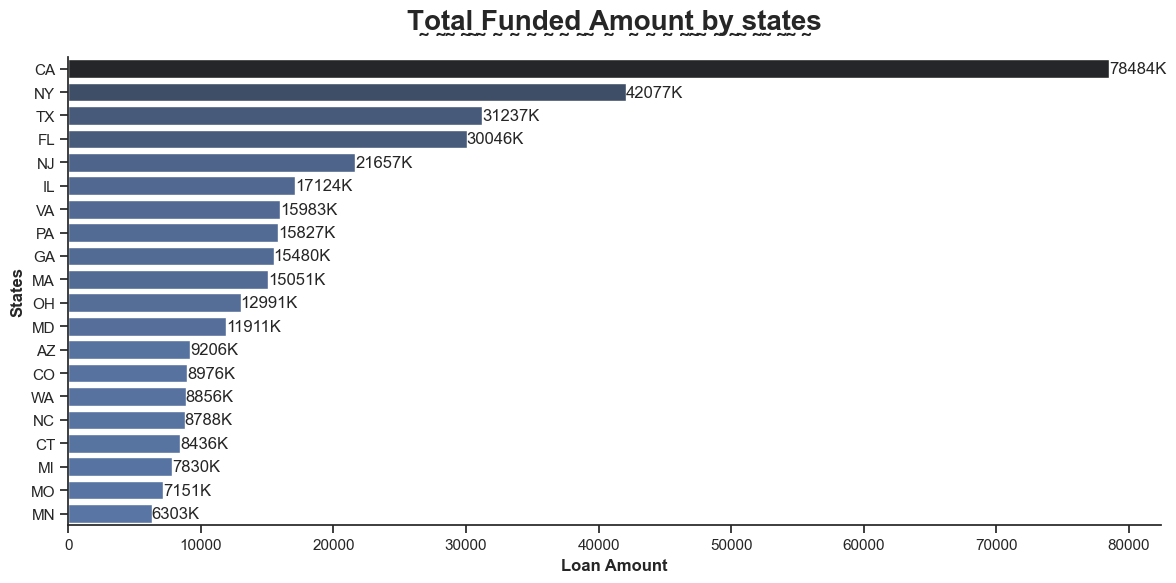

In [42]:
state_wise_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending= False).head(20)
state_wise_funding = state_wise_funding/1000
state_wise_funding = state_wise_funding.reset_index(name= 'Loan Amount')

plt.figure(figsize= (12,6))
sns.barplot(data = state_wise_funding, x= state_wise_funding['Loan Amount'], y= state_wise_funding['address_state'], 
            hue = 'Loan Amount', 
            palette= 'dark:b_r', 
            legend = False
            )
sns.set_theme(style= 'ticks')
sns.despine()
for i,txt in enumerate(state_wise_funding['Loan Amount']):
    plt.text(txt + 1, i, f"{txt:.0f}K", va = 'center')
plt.title('\u0330'.join('Total Funded Amount by states'), fontsize = 20, fontweight = 'bold', pad= 20)
plt.ylabel('States', fontweight = 'bold')
plt.xlabel('Loan Amount', fontweight = 'bold')
plt.tight_layout()
plt.show()